In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from Marc_Project_3_Module import TCSI
from Marc_Project_3_Module import seasonal_index_rank
month_lst=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

d:\programs\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
########################################################################################################

In [3]:
metro_df = pd.read_csv('data_acquisition/combined/metro.csv')
population_df = pd.read_csv('data_acquisition/combined/population.csv')
allmetros_df= pd.read_csv('data_acquisition/combined/all_metros1.csv')
gdp_df = pd.read_csv('data_acquisition/combined/gdp.csv')

In [4]:
metro_df['Date'] = pd.to_datetime(metro_df['Date'])

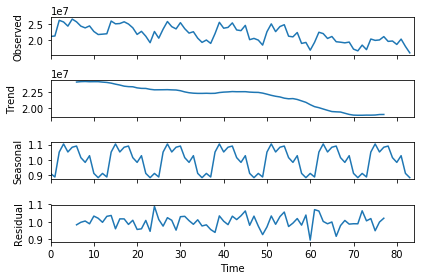

In [5]:
#Get arguments for the function call
year_start = metro_df.at[0,'Date'].year
time_interval_lst = metro_df['Date'].tolist()
series_lst =metro_df['Ridership'].tolist()

#Call the function for TCSI
TCSI_result,result_df = TCSI(time_interval_lst,series_lst,year_start)

TCSI_result.plot()
plt.show()

In [6]:
seasonal_index_rank(result_df)

Apr--> 1.10368129252
Jul--> 1.08992193836
Jun--> 1.08230835178
May--> 1.05142726816
Mar--> 1.05080554826
Oct--> 1.02724980163
Aug--> 1.01451853912
Sep--> 0.983724432431
Nov--> 0.912028007182
Jan--> 0.911812450609
Feb--> 0.888482637347
Dec--> 0.884039732595


In [7]:
####################################################################################################

In [8]:
result_df.tail(12)

,observed,resid,seasonal,trend,Year,Month,Date
72,18349147,1.063314,0.911812,1.892556e+07,2017,Jan,2017-01-31
73,16922920,1.005337,0.888483,1.894587e+07,2017,Feb,2017-02-28
74,20269488,1.018407,1.050806,1.894082e+07,2017,Mar,2017-03-31
75,19842700,0.948280,1.103681,1.895921e+07,2017,Apr,2017-04-30
76,19978369,0.998277,1.051427,1.903399e+07,2017,May,2017-05-31
77,21030458,1.020355,1.082308,1.904349e+07,2017,Jun,2017-06-30
78,19522119,NaN,1.089922,NaN,2017,Jul,2017-07-31
79,19645882,NaN,1.014519,NaN,2017,Aug,2017-08-31
80,18560071,NaN,0.983724,NaN,2017,Sep,2017-09-30
81,20248022,NaN,1.027250,NaN,2017,Oct,2017-10-31


In [9]:
y_series=result_df['observed'].divide(1000000)
x_series=result_df['Date']

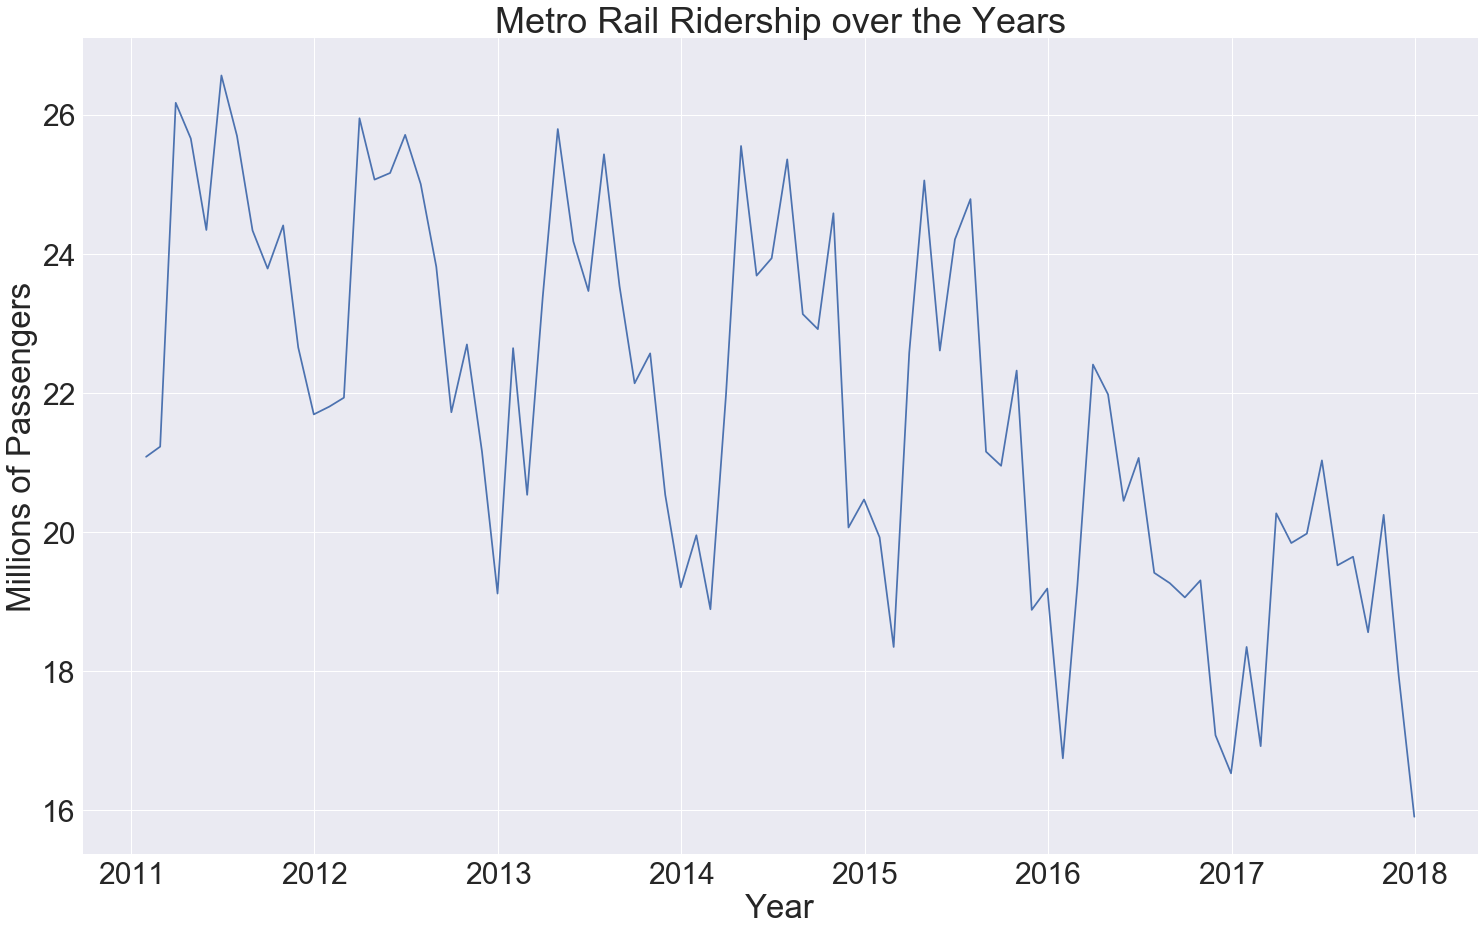

In [10]:
import seaborn as sns
from pandas import Series

plt.figure(figsize=(25,15))
sns.set(font_scale=3)
plt.title("Metro Rail Ridership over the Years")
plt.xlabel("Year")
plt.ylabel('Millions of Passengers')

sns.set_style("darkgrid")
plt.plot(x_series,y_series)
plt.savefig('Metro_Ridership.png')
plt.show()


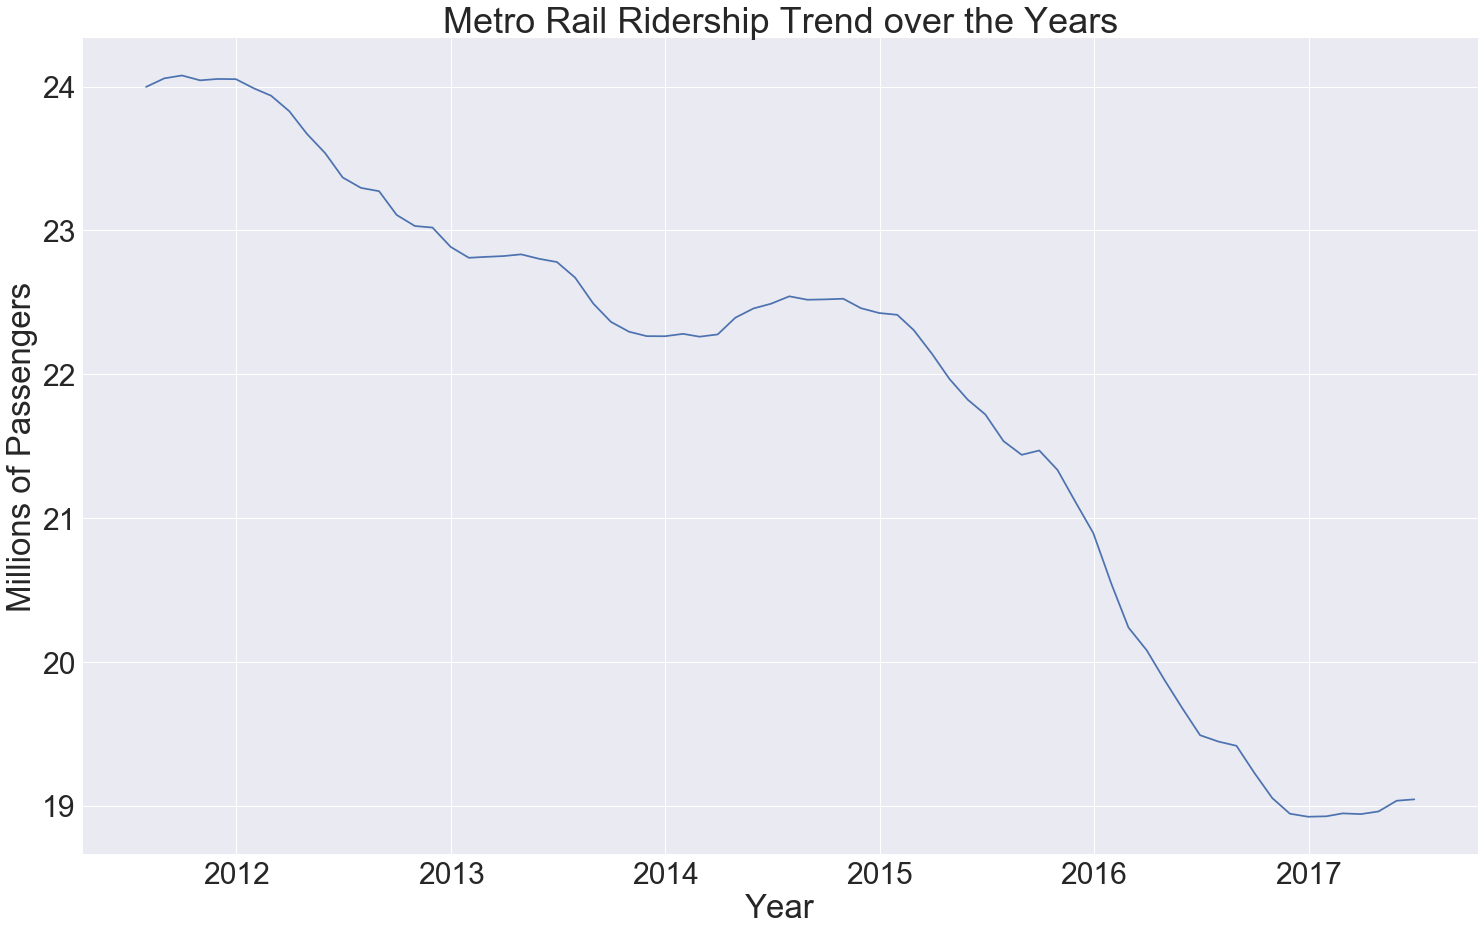

In [11]:
y_series=result_df['trend'].divide(1000000)
plt.figure(figsize=(25,15))
sns.set(font_scale=3)
plt.title("Metro Rail Ridership Trend over the Years")
plt.xlabel("Year")
plt.ylabel('Millions of Passengers')

sns.set_style("darkgrid")
plt.plot(x_series,y_series)
plt.savefig('Metro_Trend.png')
plt.show()

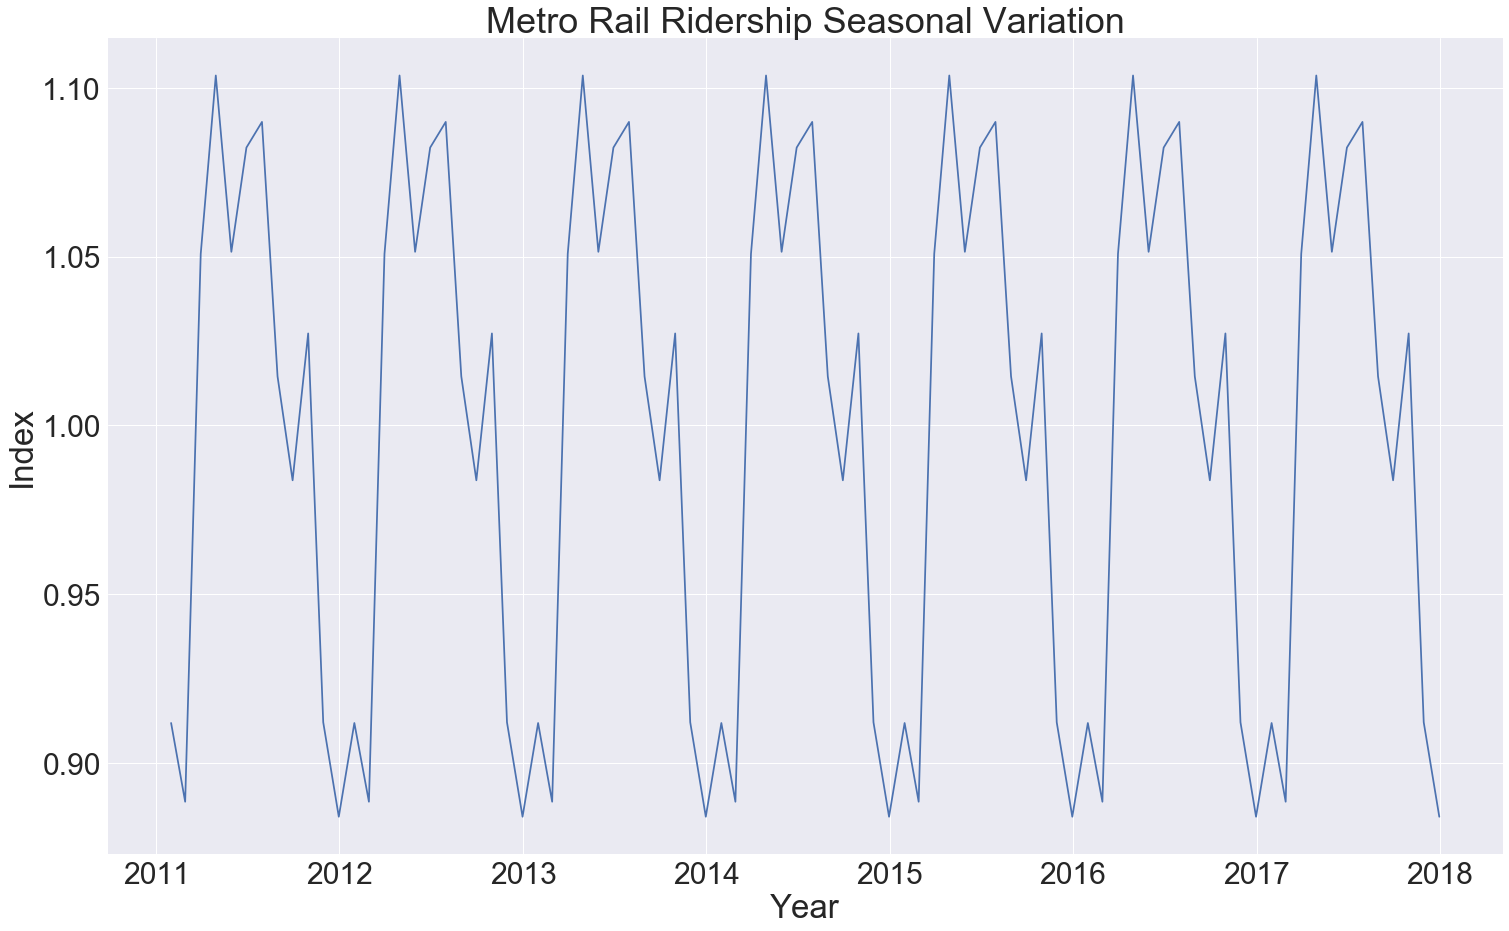

In [12]:
y_series=result_df['seasonal']
plt.figure(figsize=(25,15))
sns.set(font_scale=3)
plt.title("Metro Rail Ridership Seasonal Variation")
plt.xlabel("Year")
plt.ylabel('Index')

sns.set_style("darkgrid")
plt.plot(x_series,y_series)
plt.savefig('Metro_Seasonal.png')
plt.show()


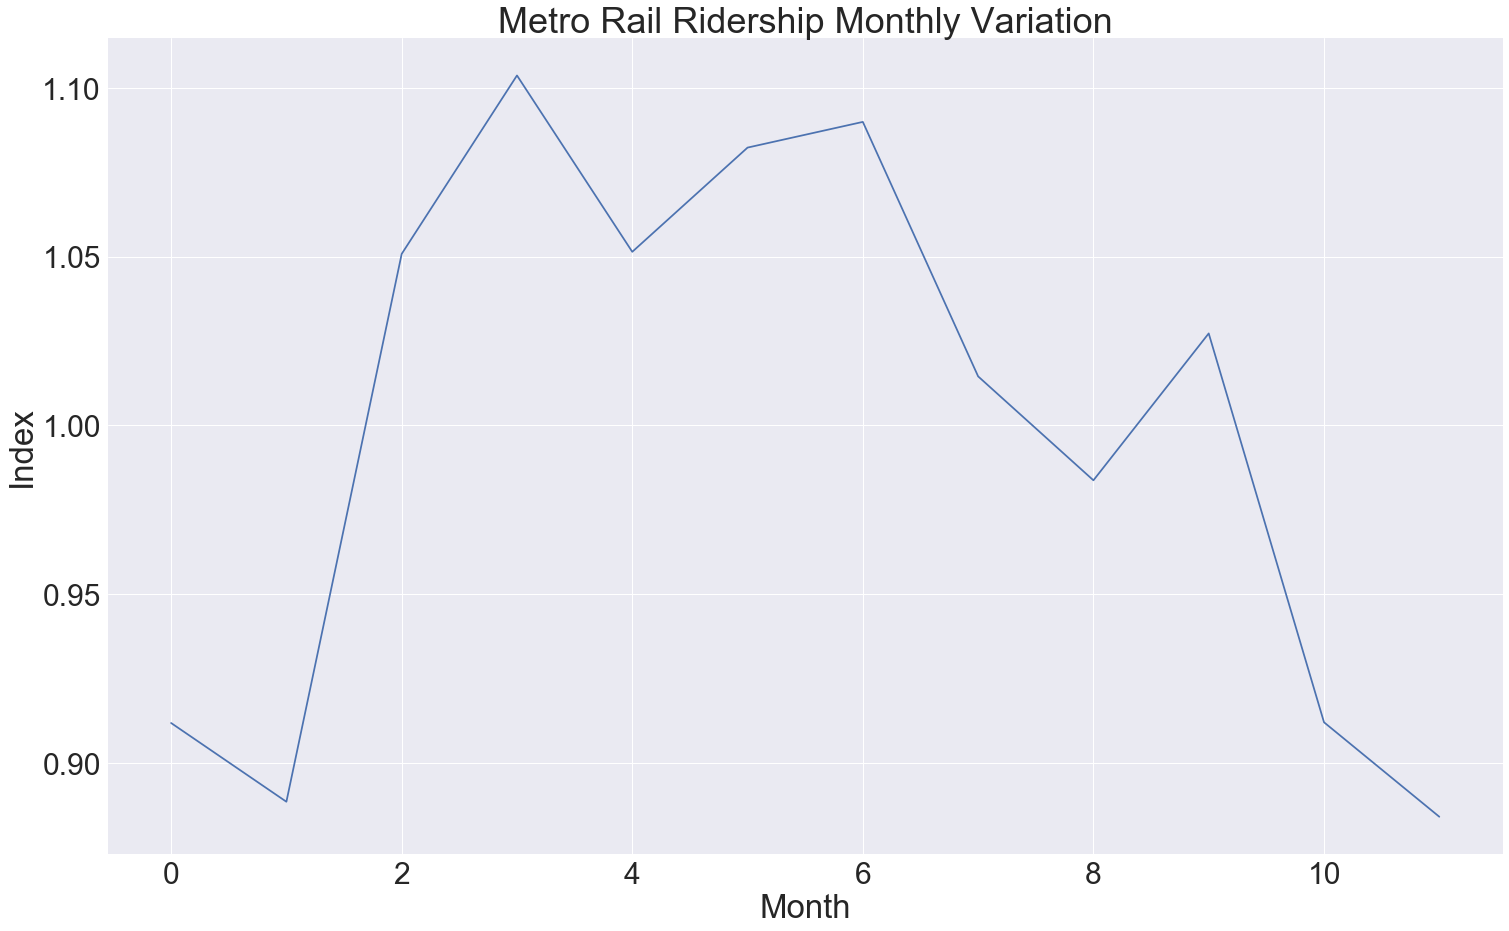

In [13]:
seasonal_df=result_df.loc[:,['seasonal','Year','Month','Date']]
seasonal_df_monthly=seasonal_df[seasonal_df.Year==seasonal_df.at[0,'Date'].year]
y_series=seasonal_df_monthly['seasonal']



plt.figure(figsize=(25,15))
sns.set(font_scale=3)
sns.set(font_scale=3)
plt.title("Metro Rail Ridership Monthly Variation")
plt.xlabel("Month")
plt.ylabel('Index')

sns.set_style("darkgrid")
plt.plot(y_series)
plt.savefig('Metro_Monthly.png')
plt.show()


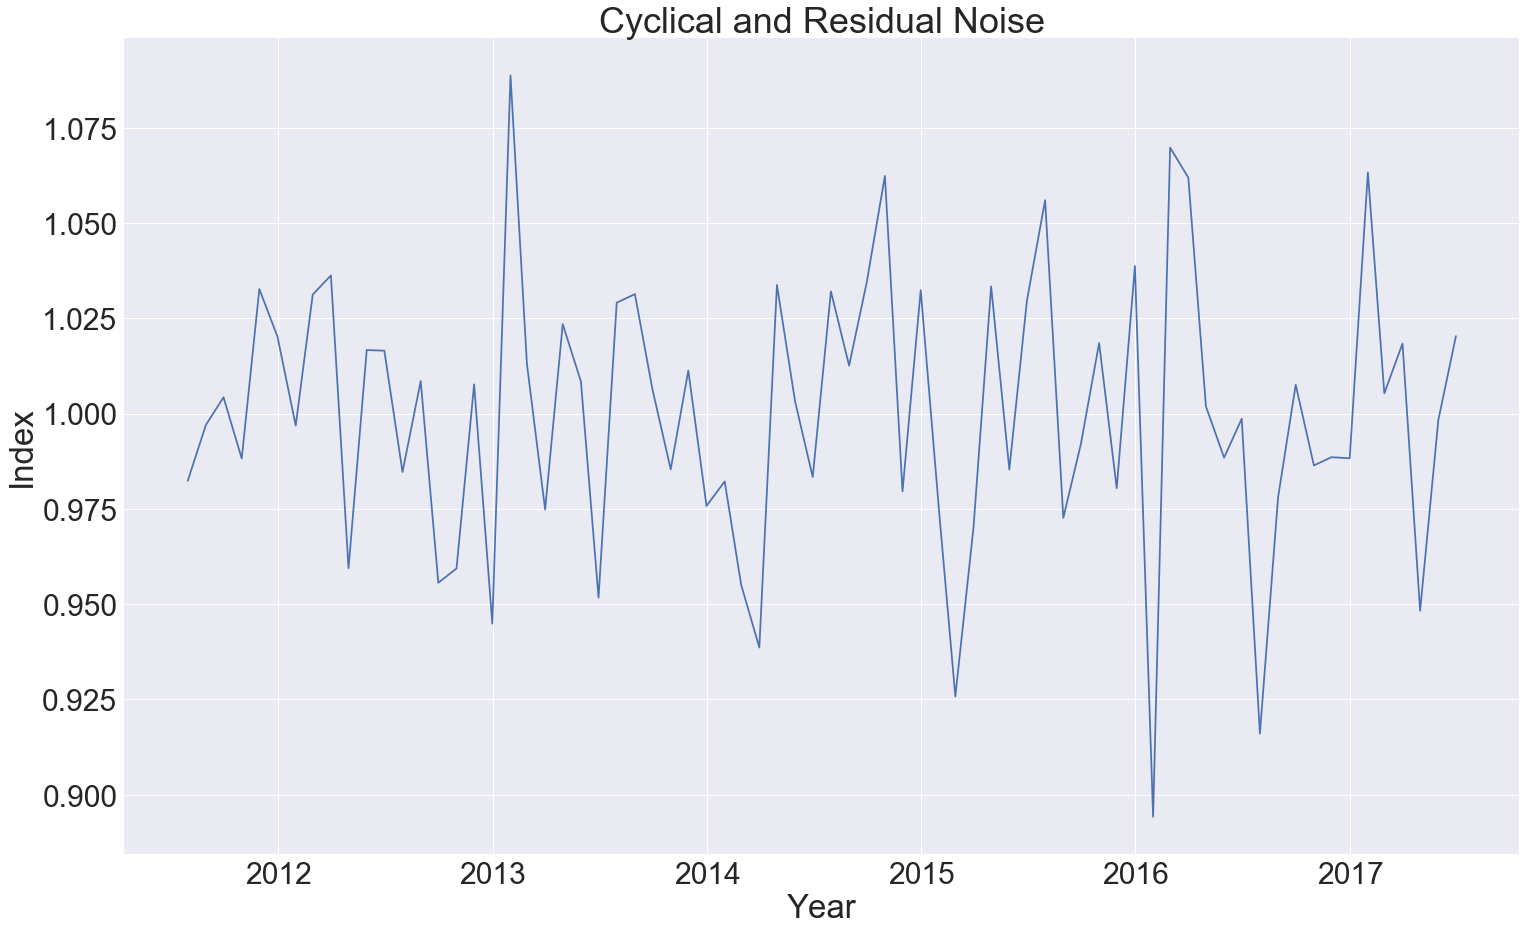

In [14]:
x_series=result_df['Date']
y_series=result_df['resid']

plt.figure(figsize=(25,15))
sns.set(font_scale=3)
plt.title("Cyclical and Residual Noise")
plt.xlabel("Year")
plt.ylabel('Index')

sns.set_style("darkgrid")
plt.plot(x_series,y_series)
plt.savefig('Metro_Noise.png')
plt.show()

In [15]:
population_df

,Year,Population
0,2011,5503801
1,2012,5603696
2,2013,5759330
3,2014,5863608
4,2015,5949403
5,2016,6011752
6,2017,6108817


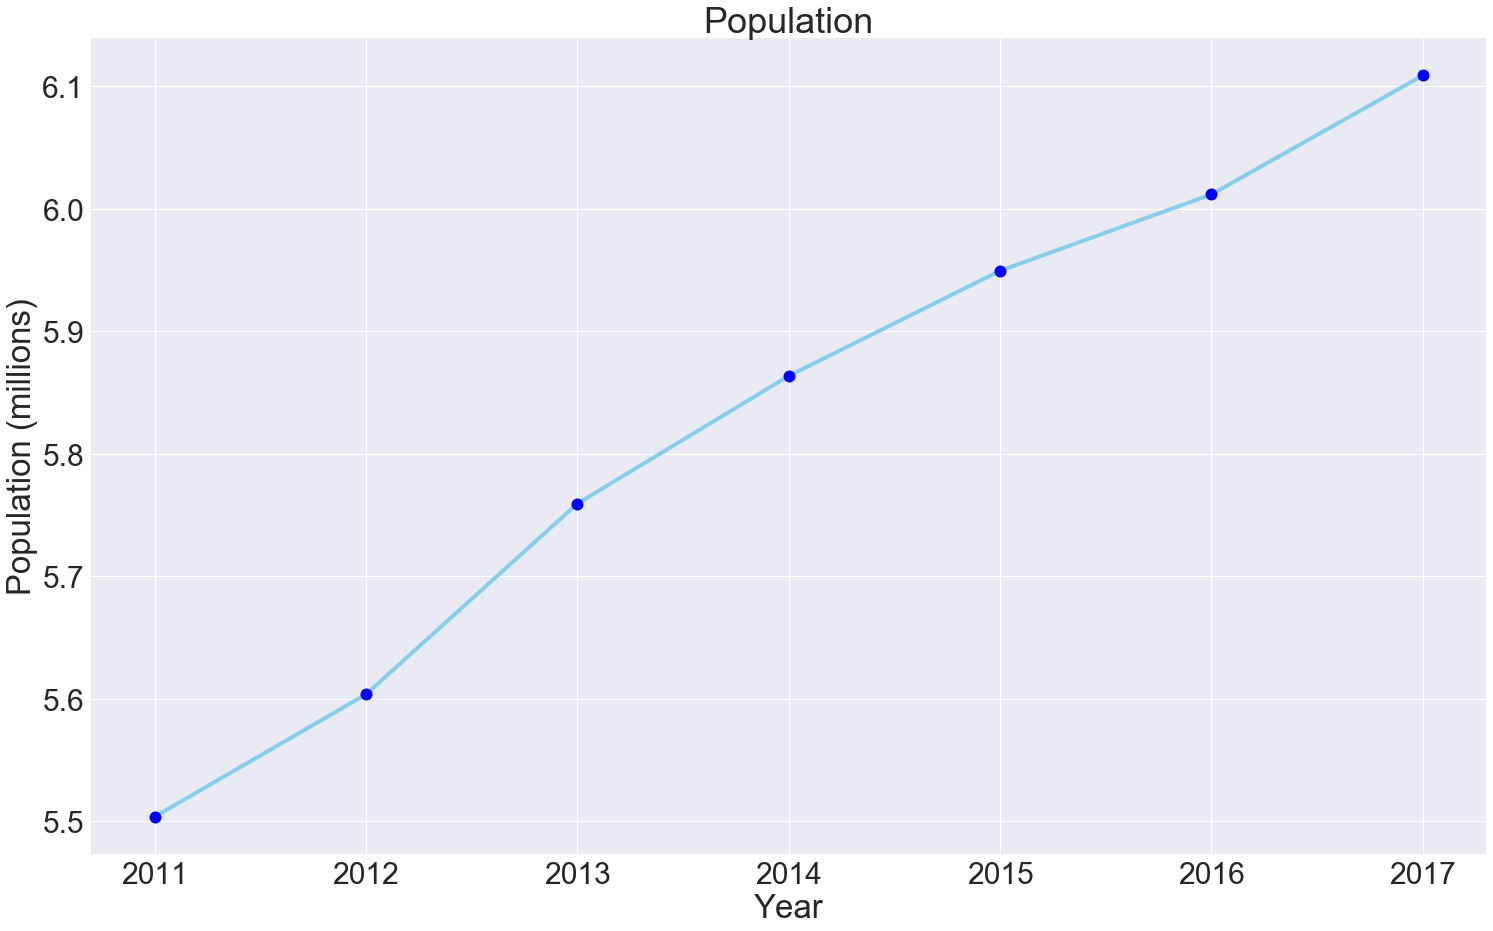

In [16]:
y_series=population_df['Population'].divide(1000000)
x_series=population_df['Year']
plt.figure(figsize=(25,15))
sns.set(font_scale=3)
plt.title("Population")
plt.xlabel("Year")
plt.ylabel('Population (millions)')
#plt.xlim(0,18000)
#plt.ylim(5,25)
#plt.axis([2011, 2017, 0, 20])



sns.set_style("darkgrid")
plt.plot(x_series,y_series, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.savefig('Population.png')
plt.show()

In [17]:
allmetros_df.head()

,Date,Massachusetts Bay Transportation Authority,MTA New York City Transit,Port Authority Transit Corporation,Port Authority Trans-Hudson Corporation,Staten Island Rapid Transit Operating Authority dba: MTA Staten Island Railway,Southeastern Pennsylvania Transportation Authority,Washington Metropolitan Area Transit Authority,Maryland Transit Administration,Metropolitan Atlanta Rapid Transit Authority,Miami-Dade Transit,Alternativa de Transporte Integrado_ATI,The Greater Cleveland Regional Transit Authority,Chicago Transit Authority,San Francisco Bay Area Rapid Transit District,Los Angeles County Metropolitan Transportation Authority dba: Metro
0,JAN11,11641300,193164194,820426,6326891,617275,7993511,21082553,1100008,5422254,1499324,835932,451723,16297860,8728778,3789697
1,FEB11,11743600,188515472,819778,6288231,578014,8052460,21228262,1147090,5818002,1474145,924521,446057,15836877,8441890,3526064
2,MAR11,13995700,219634627,957627,7584667,741311,9250967,26170157,1332704,6542373,1673175,1057161,500546,18685321,9555408,3986555
3,APR11,13593600,201682097,879523,7271097,634773,8413600,25656797,1237039,6389606,1575829,862609,459323,18062540,9346845,3910711
4,MAY11,13769300,225099318,879057,7267129,703301,8759787,24342603,1267985,6231213,1538200,890359,463978,18455789,9532758,3852879


In [18]:
all_metro_lst = ['Massachusetts Bay Transportation Authority','MTA New York City Transit','Port Authority Transit Corporation',
                 'Port Authority Trans-Hudson Corporation',
                 'Staten Island Rapid Transit Operating Authority dba: MTA Staten Island Railway',
                 'Southeastern Pennsylvania Transportation Authority','Washington Metropolitan Area Transit Authority',
                 'Maryland Transit Administration','Metropolitan Atlanta Rapid Transit Authority','Miami-Dade Transit',
                 'Alternativa de Transporte Integrado_ATI','The Greater Cleveland Regional Transit Authority',
                 'Chicago Transit Authority','San Francisco Bay Area Rapid Transit District',
                 'Los Angeles County Metropolitan Transportation Authority dba: Metro']

In [19]:
metro_divide_df = allmetros_df[all_metro_lst].apply (lambda x: x/1000000)
metro_divide_df.head()

,Massachusetts Bay Transportation Authority,MTA New York City Transit,Port Authority Transit Corporation,Port Authority Trans-Hudson Corporation,Staten Island Rapid Transit Operating Authority dba: MTA Staten Island Railway,Southeastern Pennsylvania Transportation Authority,Washington Metropolitan Area Transit Authority,Maryland Transit Administration,Metropolitan Atlanta Rapid Transit Authority,Miami-Dade Transit,Alternativa de Transporte Integrado_ATI,The Greater Cleveland Regional Transit Authority,Chicago Transit Authority,San Francisco Bay Area Rapid Transit District,Los Angeles County Metropolitan Transportation Authority dba: Metro
0,11.6413,193.164194,0.820426,6.326891,0.617275,7.993511,21.082553,1.100008,5.422254,1.499324,0.835932,0.451723,16.297860,8.728778,3.789697
1,11.7436,188.515472,0.819778,6.288231,0.578014,8.052460,21.228262,1.147090,5.818002,1.474145,0.924521,0.446057,15.836877,8.441890,3.526064
2,13.9957,219.634627,0.957627,7.584667,0.741311,9.250967,26.170157,1.332704,6.542373,1.673175,1.057161,0.500546,18.685321,9.555408,3.986555
3,13.5936,201.682097,0.879523,7.271097,0.634773,8.413600,25.656797,1.237039,6.389606,1.575829,0.862609,0.459323,18.062540,9.346845,3.910711
4,13.7693,225.099318,0.879057,7.267129,0.703301,8.759787,24.342603,1.267985,6.231213,1.538200,0.890359,0.463978,18.455789,9.532758,3.852879


In [20]:
x=result_df['Date']
type(x)
metro_divide_df['Date'] = x
metro_divide_df.head()

,Massachusetts Bay Transportation Authority,MTA New York City Transit,Port Authority Transit Corporation,Port Authority Trans-Hudson Corporation,Staten Island Rapid Transit Operating Authority dba: MTA Staten Island Railway,Southeastern Pennsylvania Transportation Authority,Washington Metropolitan Area Transit Authority,Maryland Transit Administration,Metropolitan Atlanta Rapid Transit Authority,Miami-Dade Transit,Alternativa de Transporte Integrado_ATI,The Greater Cleveland Regional Transit Authority,Chicago Transit Authority,San Francisco Bay Area Rapid Transit District,Los Angeles County Metropolitan Transportation Authority dba: Metro,Date
0,11.6413,193.164194,0.820426,6.326891,0.617275,7.993511,21.082553,1.100008,5.422254,1.499324,0.835932,0.451723,16.297860,8.728778,3.789697,2011-01-31
1,11.7436,188.515472,0.819778,6.288231,0.578014,8.052460,21.228262,1.147090,5.818002,1.474145,0.924521,0.446057,15.836877,8.441890,3.526064,2011-02-28
2,13.9957,219.634627,0.957627,7.584667,0.741311,9.250967,26.170157,1.332704,6.542373,1.673175,1.057161,0.500546,18.685321,9.555408,3.986555,2011-03-31
3,13.5936,201.682097,0.879523,7.271097,0.634773,8.413600,25.656797,1.237039,6.389606,1.575829,0.862609,0.459323,18.062540,9.346845,3.910711,2011-04-30
4,13.7693,225.099318,0.879057,7.267129,0.703301,8.759787,24.342603,1.267985,6.231213,1.538200,0.890359,0.463978,18.455789,9.532758,3.852879,2011-05-31


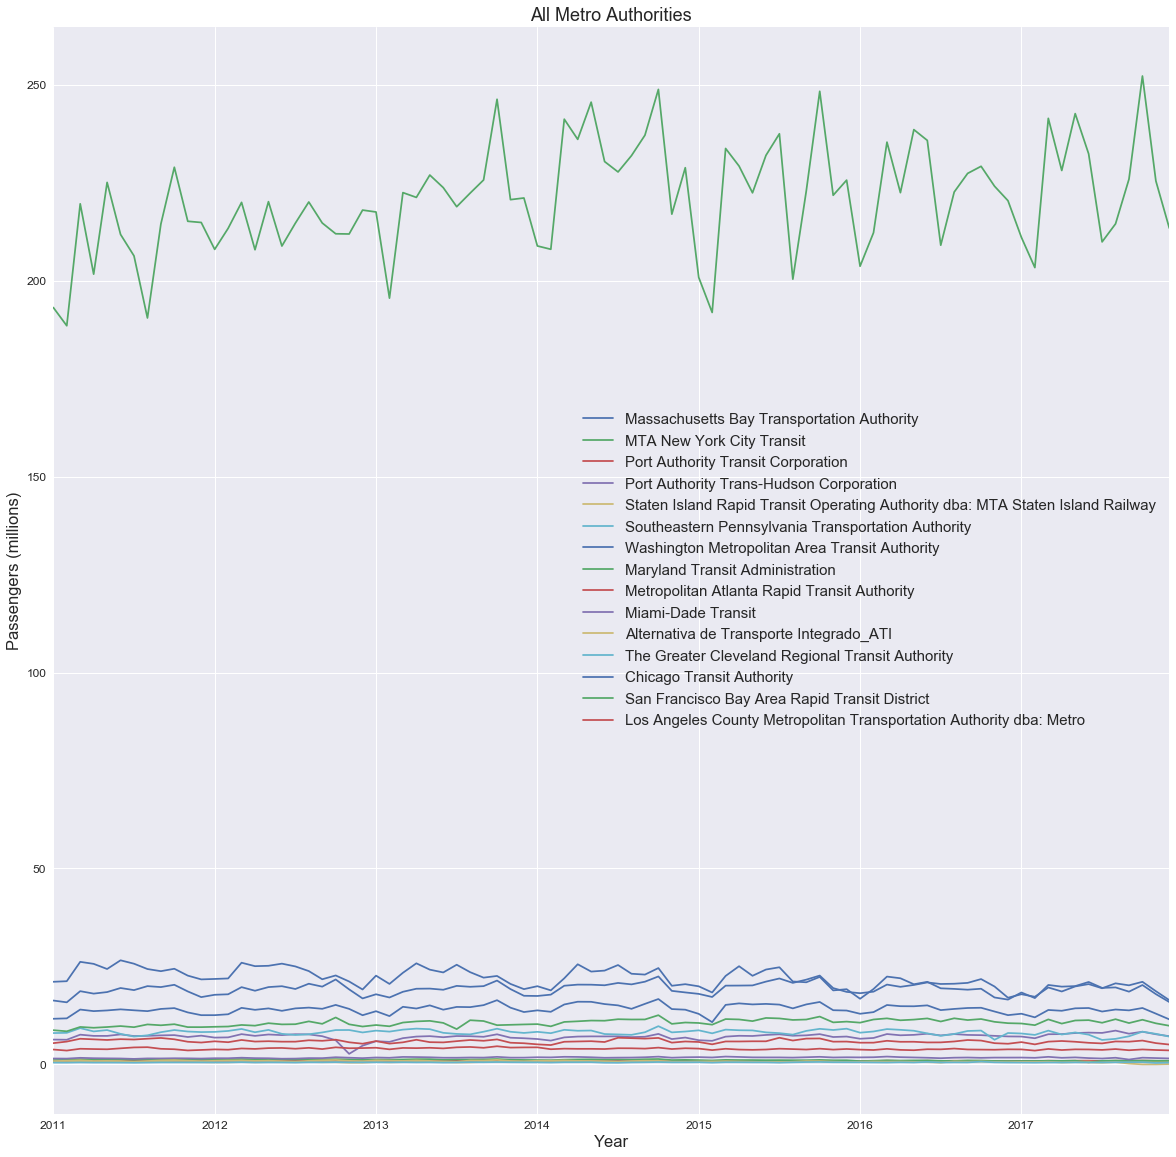

In [21]:
sns.set(font_scale=1.5)

sns.set_style("darkgrid")

fig, ax = plt.subplots()
plt.title("All Metro Authorities")
#plt.xlabel("Date")
#plt.ylabel('Passengers (millions)')
ax=metro_divide_df.plot(x='Date', figsize =(20,20),fontsize='12',ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Passengers (millions)")
plt.savefig('Allmetros.png')
plt.show()

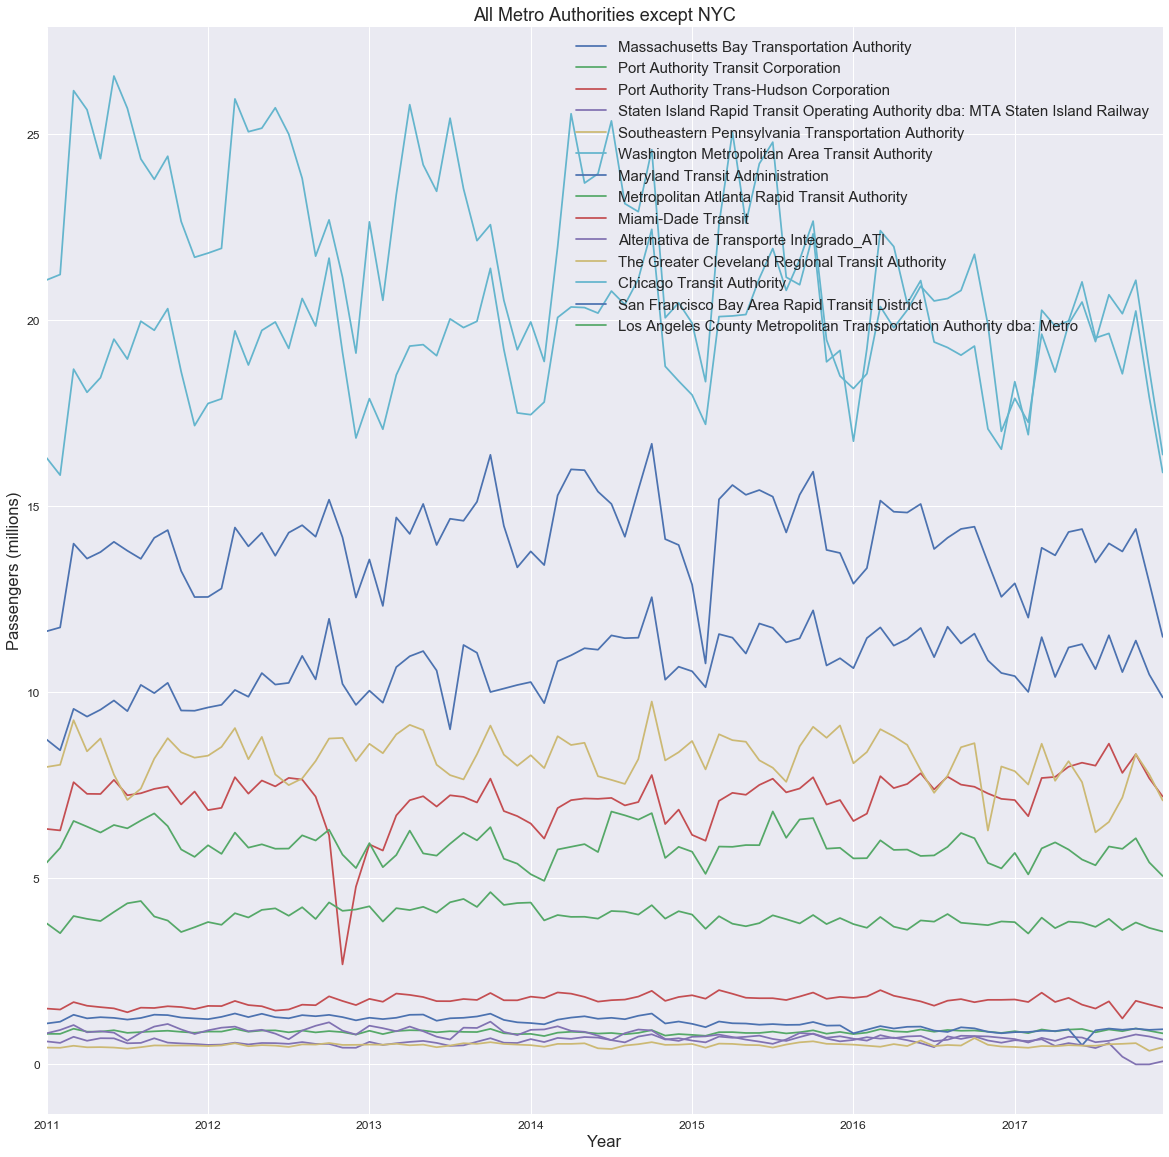

In [22]:
tempmetros_df=metro_divide_df.drop(['MTA New York City Transit'], axis=1)
fig, ax = plt.subplots()
plt.title("All Metro Authorities except NYC")
ax=tempmetros_df.plot(x='Date', figsize =(20,20),fontsize='12',ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Passengers (millions)")
plt.savefig('Metro_no_NYC.png')
plt.show()


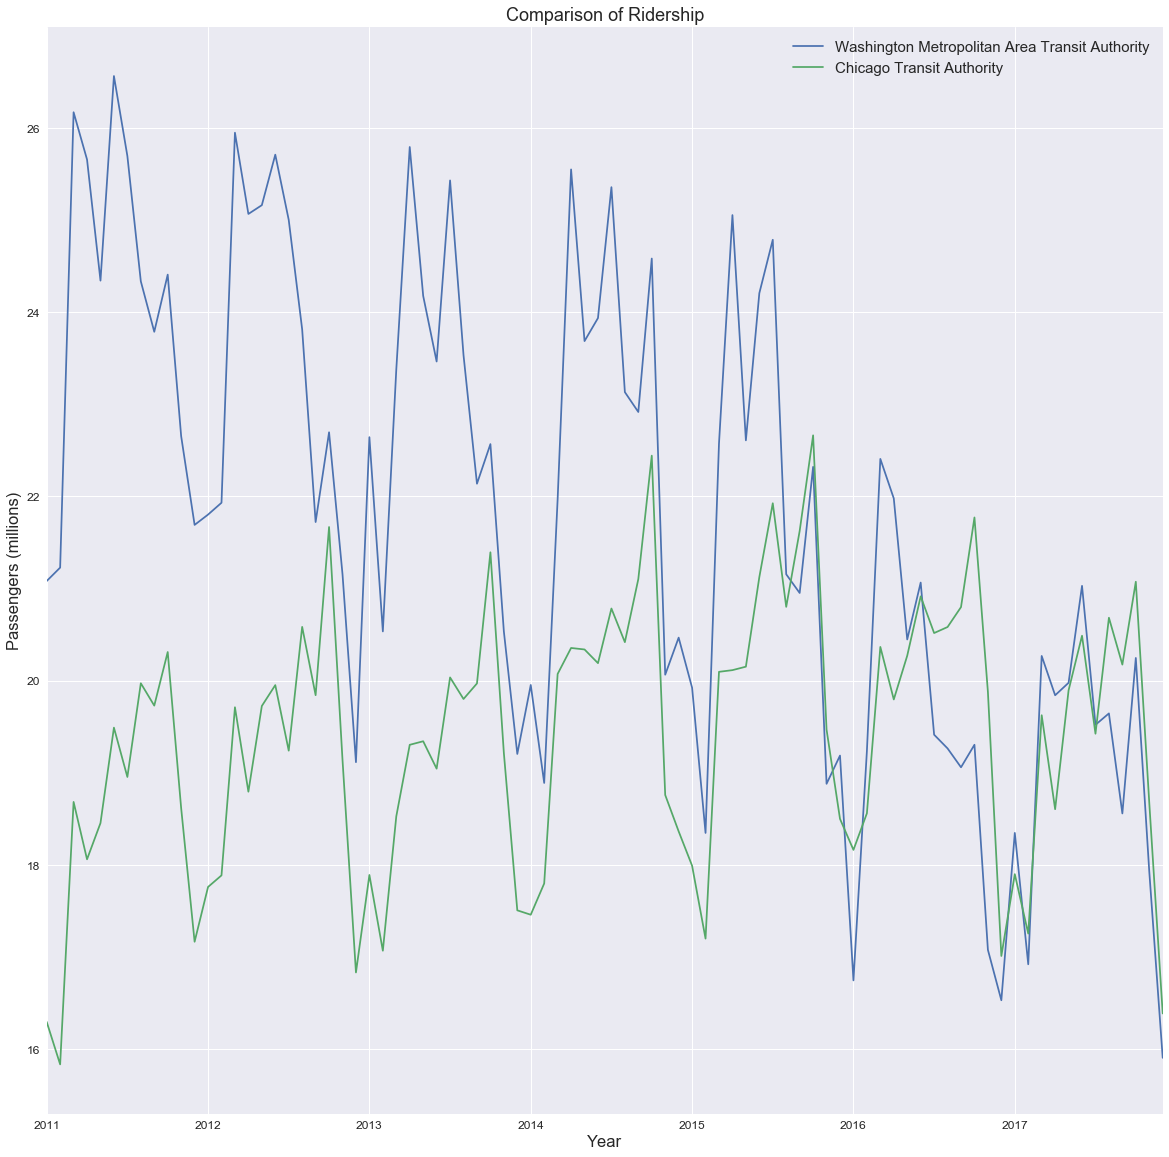

In [23]:
drop_lst=['Massachusetts Bay Transportation Authority','MTA New York City Transit','Port Authority Transit Corporation',
                 'Port Authority Trans-Hudson Corporation',
                 'Staten Island Rapid Transit Operating Authority dba: MTA Staten Island Railway',
                 'Southeastern Pennsylvania Transportation Authority',
                 'Maryland Transit Administration','Metropolitan Atlanta Rapid Transit Authority','Miami-Dade Transit',
                 'Alternativa de Transporte Integrado_ATI','The Greater Cleveland Regional Transit Authority',
                 'San Francisco Bay Area Rapid Transit District',
                 'Los Angeles County Metropolitan Transportation Authority dba: Metro']

tempmetros_df=metro_divide_df.drop(drop_lst, axis=1)
fig, ax = plt.subplots()
plt.title("Comparison of Ridership")
ax=tempmetros_df.plot(x='Date', figsize =(20,20),fontsize='12',ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Passengers (millions)")
plt.savefig('Metro_and_Chicago.png')
plt.show()


In [24]:
gdp_df

,Year,GDP per capita
0,2011,74918
1,2012,74125
2,2013,72449
3,2014,72092
4,2015,73117
5,2016,73270
6,2017,73715


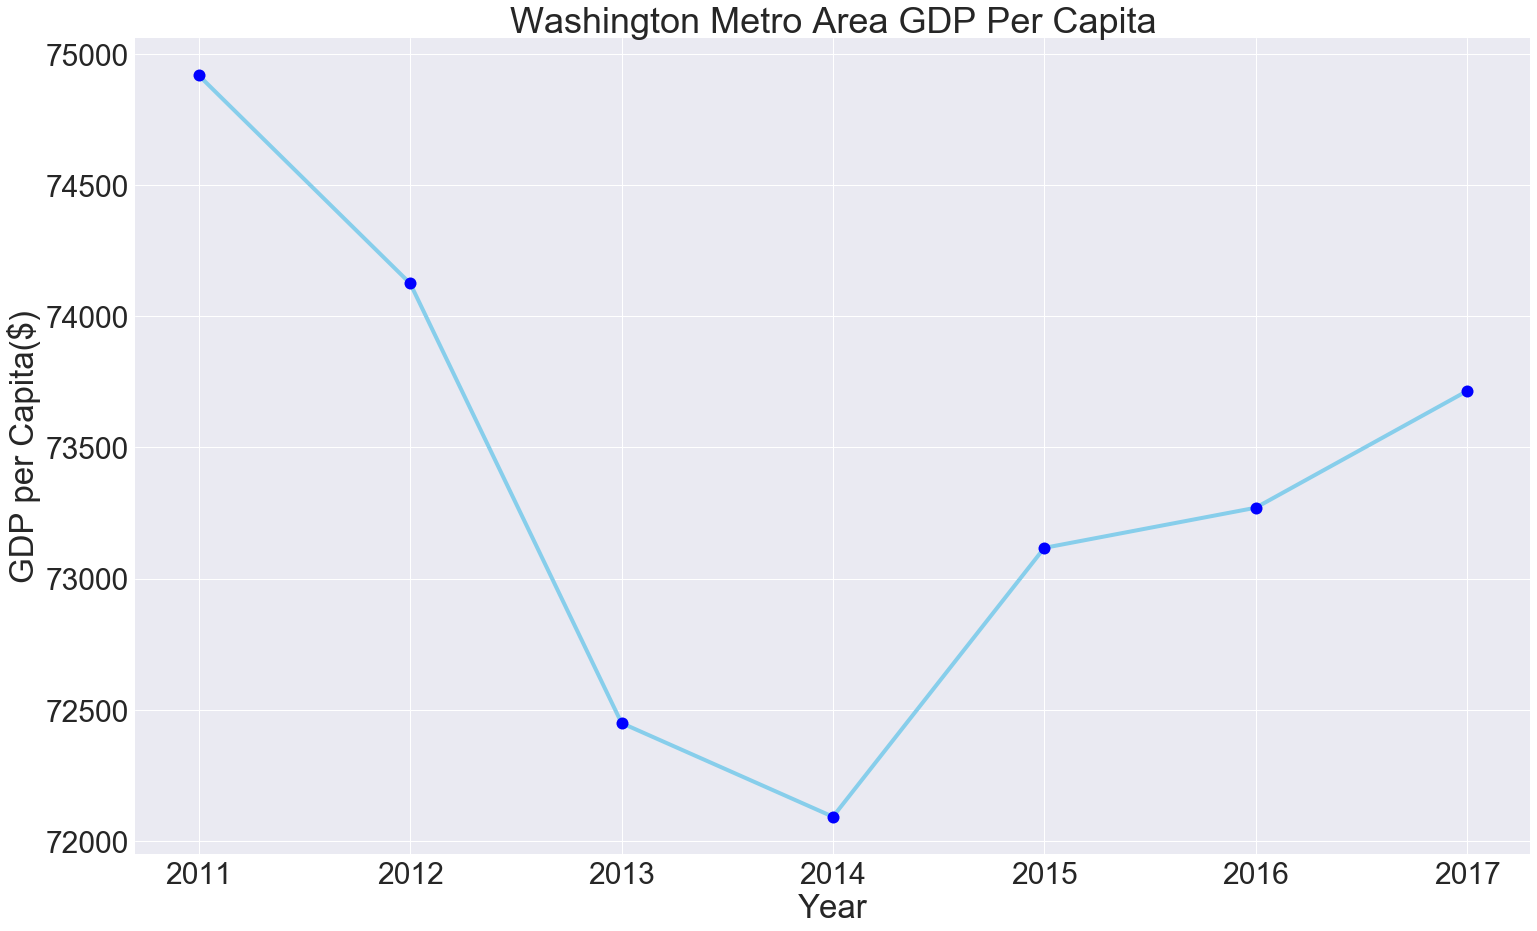

In [25]:
import seaborn as sns
y_series=gdp_df['GDP per capita']
x_series=gdp_df['Year']
plt.figure(figsize=(25,15))
sns.set(font_scale=3)
plt.title("Washington Metro Area GDP Per Capita")
plt.xlabel("Year")
plt.ylabel('GDP per Capita($)')




sns.set_style("darkgrid")
plt.plot(x_series,y_series, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.savefig('gdp1.png')
plt.show()